In [724]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [725]:
numerical = pd.read_csv('numerical.csv')

In [726]:
numerical.head()

,Unnamed: 0.1,Unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645,1


In [727]:
numerical.drop(['Unnamed: 0.1'],axis=1,inplace=True)

In [728]:
numerical.drop(['Unnamed: 0'],axis=1,inplace=True)

In [729]:
numerical.drop(['month'],axis=1,inplace=True)

In [731]:
numerical.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645


In [732]:
# 1 - create x,y (take out the Y = total claim amount)

X = numerical.drop(['total claim amount'],axis=1)
Y = numerical['total claim amount']

In [733]:
# 2 - normalize x
    # removing outliers
    # transformig
    # non-normal - normal

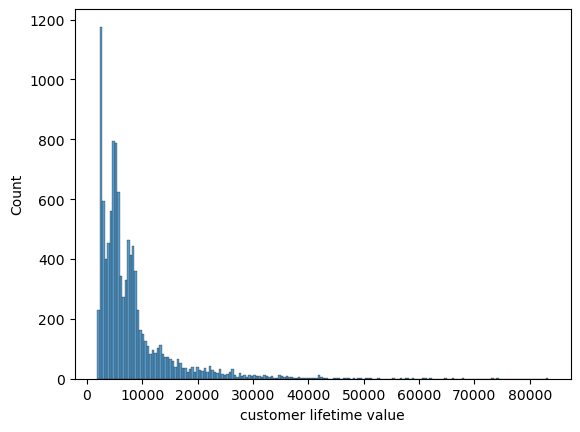

In [723]:
sns.histplot(numerical['customer lifetime value'])
plt.show()

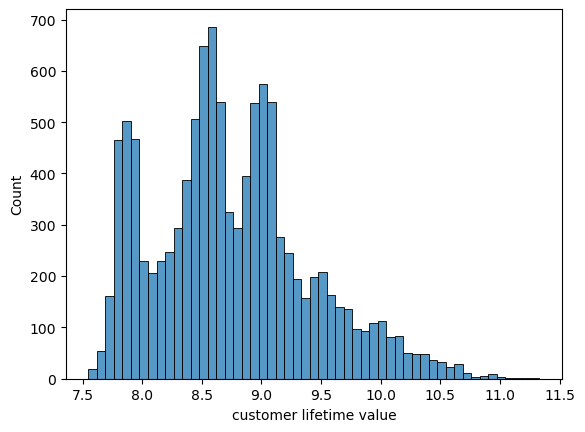

In [734]:
# not normal - using log method to normalize
numerical['customer lifetime value'] = np.where(numerical['customer lifetime value'] < 0, 0, numerical['customer lifetime value'])
numerical['customer lifetime value']=numerical['customer lifetime value'].replace(0,numerical['customer lifetime value'].mean())
stats.boxcox(numerical['customer lifetime value']) 

numerical['customer lifetime value'] = np.log(numerical['customer lifetime value'])
sns.histplot(numerical['customer lifetime value'])
plt.show()

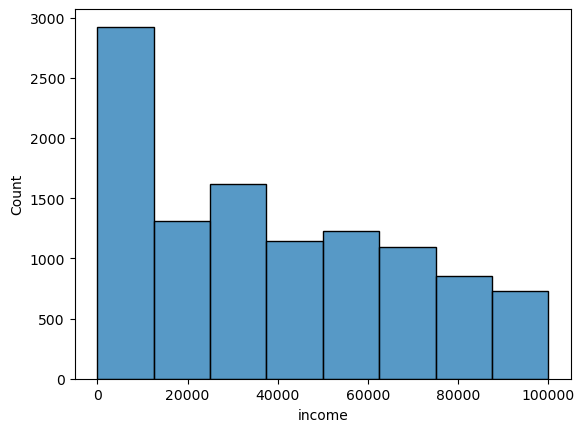

In [695]:
sns.histplot(numerical['income'],bins=8)
plt.show()

In [696]:
# not normal - using log method to normalize
#numerical['income'] = np.log(numerical['income'])
#sns.histplot(numerical['income'],bins=8)
#plt.show()

In [697]:
# not normal - using iqr method to normalize
#np.percentile(numerical['income'],75)
#np.percentile(numerical['income'],25)
#iqr = np.percentile(numerical['income'],75) - np.percentile(numerical['income'],25)
#upper_limit = (numerical['income'],75) + iqr*1.5
#lower_limit = (numerical['income'],25) - iqr*1.5


#numerical = numerical[(numerical['income'] > lower_limit) & (numerical['income'] < upper_limit )]

    # DIDN'T WORK :(

In [698]:
from scipy import stats 
len(numerical[numerical['income'] <= 0])
    
numerical['income_temp'] = np.where(numerical['income'] < 0, 0, numerical['income'])
numerical['income_temp']=numerical['income_temp'].replace(0,numerical['income'].mean())
stats.boxcox(numerical['income_temp']) 

(array([41.96179043, 39.57487942, 34.86530015, ..., 40.1394992 ,
        44.93651895, 39.57487942]),
 0.21304658811483432)

In [699]:
arr, lmbda = stats.boxcox(numerical['income_temp']) 

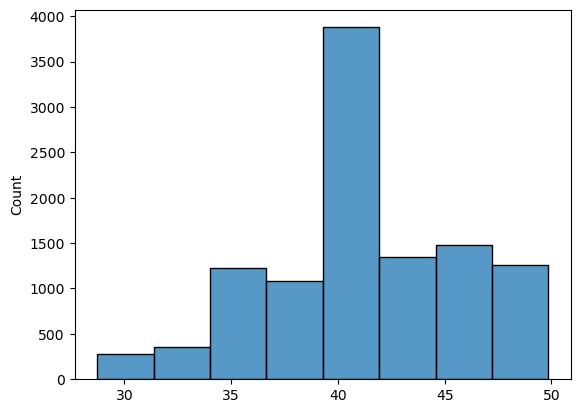

In [665]:

sns.histplot(arr,bins=8)
plt.show()

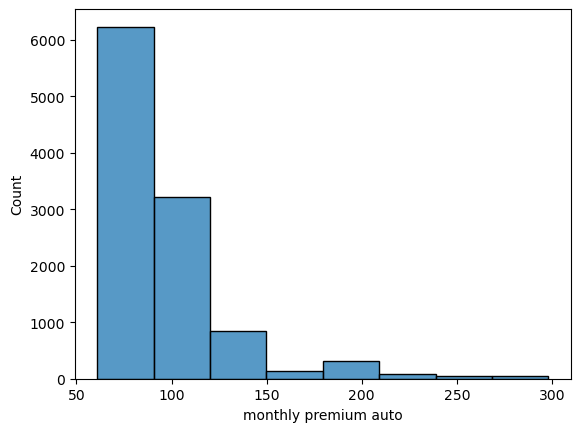

In [666]:
sns.histplot(numerical['monthly premium auto'],bins=8)
plt.show()

In [667]:
# not normal - using log method to normalize
#numerical['monthly premium auto'] = np.log(numerical['monthly premium auto'])
#sns.histplot(numerical['monthly premium auto'],bins=8)
#plt.show()

In [668]:
# not normal - using iqr method to normalize
np.percentile(numerical['monthly premium auto'],75)
np.percentile(numerical['monthly premium auto'],25)
iqr = np.percentile(numerical['monthly premium auto'],75) - np.percentile(numerical['monthly premium auto'],25)
upper_limit = (numerical['monthly premium auto'],75) + iqr*1.5
lower_limit = (numerical['monthly premium auto'],25) - iqr*1.5


/var/folders/tj/3p22v50d6ns8hpw1fn28jhmr0000gn/T/ipykernel_54093/1899026574.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  upper_limit = (numerical['monthly premium auto'],75) + iqr*1.5
/var/folders/tj/3p22v50d6ns8hpw1fn28jhmr0000gn/T/ipykernel_54093/1899026574.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lower_limit = (numerical['monthly premium auto'],25) - iqr*1.5


In [669]:

#numerical = numerical[(numerical['monthly premium auto'] > lower_limit) & (numerical['monthly premium auto'] < upper_limit )]

In [670]:
# CANT NORMALIZE IT (Monthly premium auto)

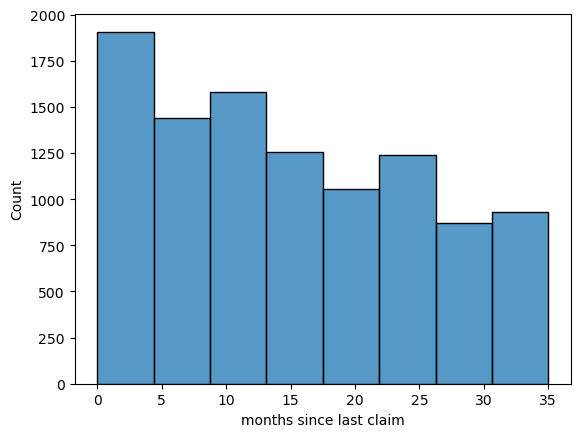

In [671]:
sns.histplot(numerical['months since last claim'],bins=8)
plt.show()

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


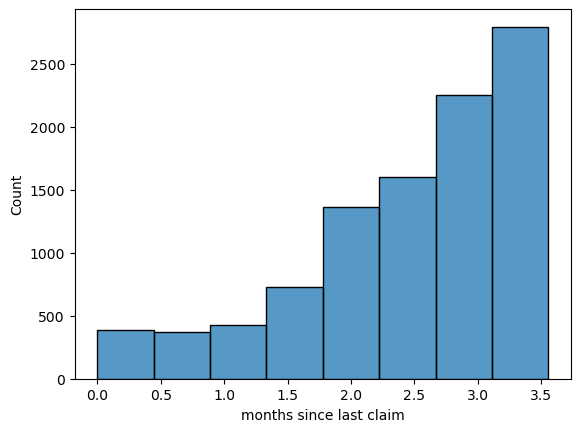

In [672]:
# not normal - using log method to normalize
numerical['months since last claim'] = np.log(numerical['months since last claim'])
sns.histplot(numerical['months since last claim'],bins=8)
plt.show()

In [673]:
len(numerical[numerical['months since last claim'] <= 0])
    
numerical['months since last claim_temp'] = np.where(numerical['months since last claim'] < 0, 0, numerical['months since last claim'])
numerical['months since last claim_temp']=numerical['months since last claim_temp'].replace(0,numerical['months since last claim'].mean())
stats.boxcox(numerical['months since last claim_temp']) 



ValueError: Data must be positive.

In [674]:
arr, lmbda = stats.boxcox(numerical['months since last claim_temp']) 
sns.histplot(arr,bins=8)
plt.show()

ValueError: Data must be positive.

In [675]:
# not normal - using iqr method to normalize
#np.percentile(numerical['months since last claim'],75)
#np.percentile(numerical['months since last claim'],25)
#iqr = np.percentile(numerical['months since last claim'],75) - np.percentile(numerical['months since last claim'],25)
#upper_limit = (numerical['months since last claim'],75) + iqr*1.5
#lower_limit = (numerical['months since last claim'],25) - iqr*1.5

#numerical = numerical[(numerical['months since last claim'] > lower_limit) & (numerical['months since last claim'] < upper_limit )]

In [676]:
# CANT NORMALIZE IT (months since last claim)

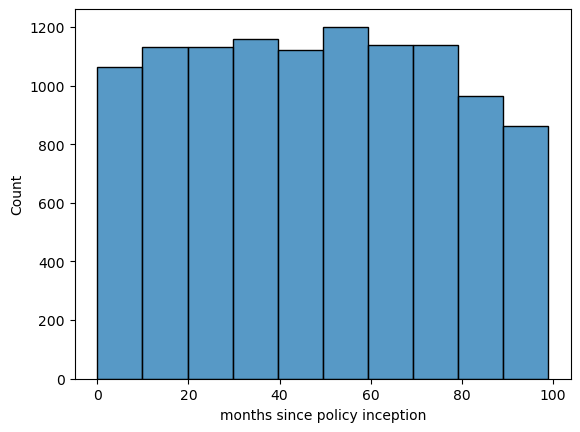

In [677]:
sns.histplot(numerical['months since policy inception'],bins=10)
plt.show()



/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


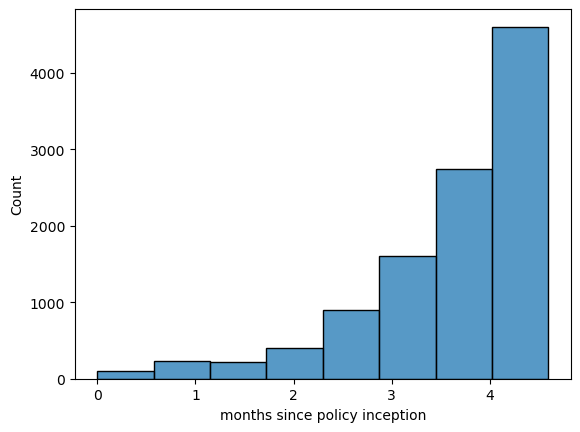

In [678]:
# not normal - using log method to normalize
numerical['months since policy inception'] = np.log(numerical['months since policy inception'])
sns.histplot(numerical['months since policy inception'],bins=8)
plt.show()

In [638]:
# not normal - using boxcox method to normalize

len(numerical[numerical['months since policy inception'] <= 0])
    
numerical['months since policy inception_temp'] = np.where(numerical['income'] < 0, 0, numerical['months since policy inception'])
numerical['months since policy inception_temp']=numerical['income_temp'].replace(0,numerical['months since policy inception'].mean())
stats.boxcox(numerical['months since policy inception_temp']) 

(array([41.96179043, 39.57487942, 34.86530015, ..., 40.1394992 ,
        44.93651895, 39.57487942]),
 0.21304658811483432)

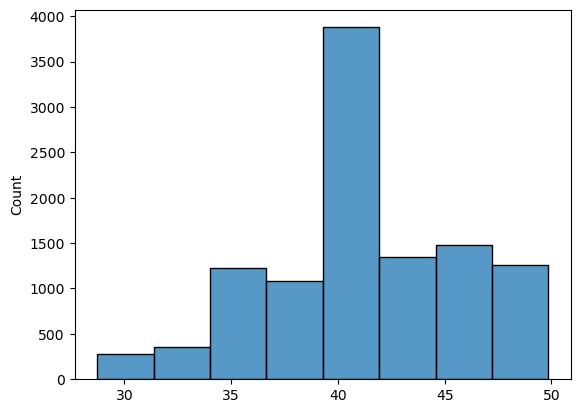

In [639]:
arr, lmbda = stats.boxcox(numerical['months since policy inception_temp']) 
sns.histplot(arr,bins=8)
plt.show()

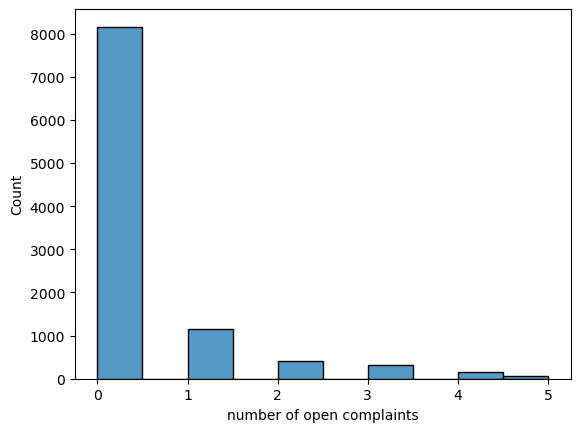

In [640]:
sns.histplot(numerical['number of open complaints'],bins=10)
plt.show()

In [641]:
#len(numerical[numerical['number of open complaints'] <= 0])
    
#numerical['number of open complaints_temp'] = np.where(numerical['number of open complaints'] < 0, 0, numerical['number of open complaints'])
#numerical['number of open complaints_temp']=numerical['number of open complaints_temp'].replace(0,numerical['number of open complaints'].mean())
#stats.boxcox(numerical['number of open complaints_temp']) 

In [642]:
#arr, lmbda = stats.boxcox(numerical['number of open complaints_temp']) 
#sns.histplot(arr,bins=8)
#plt.show()

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


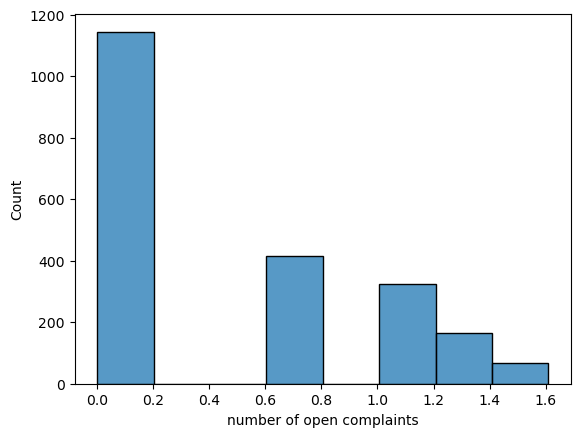

In [679]:
# not normal - using log method to normalize
numerical['number of open complaints'] = np.log(numerical['number of open complaints'])
sns.histplot(numerical['number of open complaints'],bins=8)
plt.show()

In [644]:
#numerical['number of open complaints'] = np.log(numerical['number of open complaints'])
#sns.histplot(numerical['number of open complaints'],bins=8)
#plt.show()

In [645]:
# not normal - using iqr method to normalize

np.percentile(numerical['number of open complaints'],75)
np.percentile(numerical['number of open complaints'],25)
iqr = np.percentile(numerical['number of open complaints'],75) - np.percentile(numerical['number of open complaints'],25)
upper_limit = (numerical['number of open complaints'],75) + iqr*1.5
lower_limit = (numerical['number of open complaints'],25) - iqr*1.5


numerical = numerical[(numerical['number of open complaints'] > lower_limit) & (numerical['number of open complaints'] < upper_limit )]


/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/var/folders/tj/3p22v50d6ns8hpw1fn28jhmr0000gn/T/ipykernel_54093/2829110654.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  upper_limit = (numerical['number of open complaints'],75) + iqr*1.5
/var/folders/tj/3p22v50d6ns8hpw1fn28jhmr0000gn/T/ipykernel_54093/2829110654.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lower_limit = (numerical['number of open complaints'],2

ValueError: ('Lengths must match to compare', (10910,), (2,))

In [ ]:
# CANT NORMALIZE IT (number of open complaints)

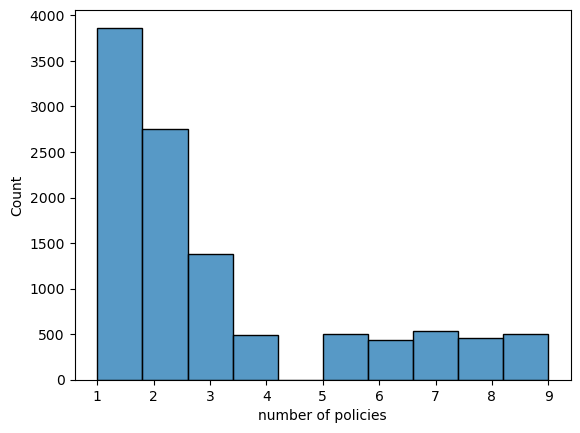

In [646]:
sns.histplot(numerical['number of policies'],bins=10)
plt.show()


In [680]:
len(numerical[numerical['number of policies'] <= 0])
    
numerical['number of policies_temp'] = np.where(numerical['number of policies'] < 0, 0, numerical['number of policies'])
numerical['number of policies_temp']=numerical['number of policies_temp'].replace(0,numerical['number of policies'].mean())
stats.boxcox(numerical['number of policies_temp']) 

(array([1.48191839, 0.        , 0.60825274, ..., 0.60825274, 1.29380408,
        0.89558363]),
 -0.3855634225961816)

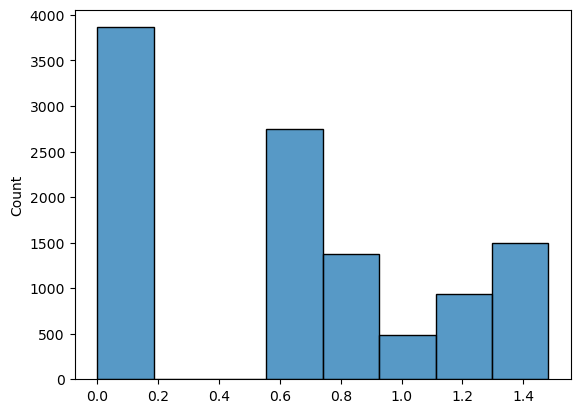

In [681]:
arr, lmbda = stats.boxcox(numerical['number of policies']) 
sns.histplot(arr,bins=8)
plt.show()

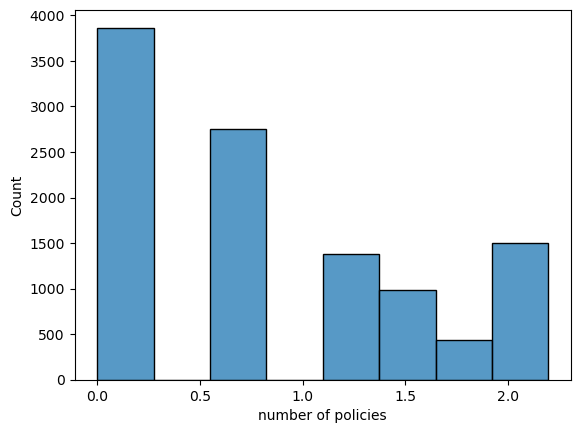

In [700]:
numerical['number of policies'] = np.log(numerical['number of policies'])
sns.histplot(numerical['number of policies'],bins=8)
plt.show()

In [ ]:
# CANT NORMALIZE IT (number of policies)

In [702]:
numerical.to_csv('numerical2.csv')

In [ ]:
pd.read